In [3]:
import pandas as pd
case1=pd.read_csv('/content/customer_churn_data.csv')
#Load dataset and check basic information, data types, shape
print("Shape of dataset:",case1.shape)
case1.head(20)

Shape of dataset: (10000, 24)


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No
5,CUST_000006,41,Male,0,No,Yes,26,Yes,No,No,...,No internet service,No internet service,Two year,No,Electronic check,23.08,585.11,4,1,No
6,CUST_000007,68,Male,1,Yes,No,9,Yes,Yes,No,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),42.87,371.67,3,1,No
7,CUST_000008,56,Female,0,Yes,No,22,Yes,No,DSL,...,No,Yes,One year,Yes,Electronic check,61.15,1352.62,5,1,No
8,CUST_000009,37,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,No,Month-to-month,No,Bank transfer (automatic),47.17,252.11,3,1,No
9,CUST_000010,53,Female,0,Yes,No,14,Yes,No,Fiber optic,...,No,No,Two year,No,Mailed check,49.69,636.29,5,2,Yes


In [4]:
print("\nData types and non-null counts:")
case1.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv          

In [5]:
#Handle missing values and display summary statistics
missing=case1.isnull().sum()

In [6]:
#Analyse churn distribution and calculate churn rate
churn_counts=case1['churn'].value_counts()
print("Churn counts:")
print(churn_counts)

Churn counts:
churn
No     7728
Yes    2272
Name: count, dtype: int64


In [7]:
churn_rate=churn_counts['Yes']/churn_counts.sum()
print("\nChurn Rate:")
print(churn_rate*100,"%")


Churn Rate:
22.720000000000002 %


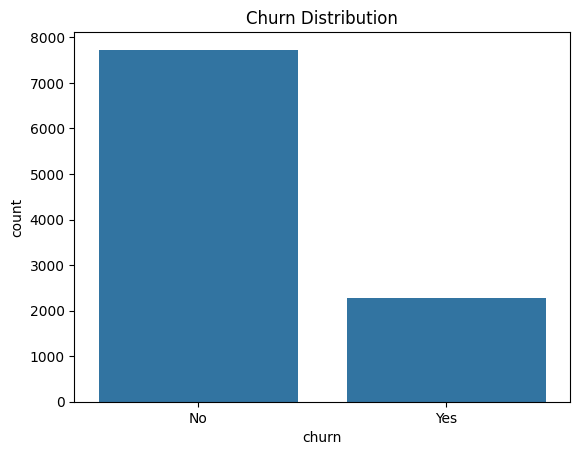

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=case1, x='churn')
plt.title('Churn Distribution')
plt.show()

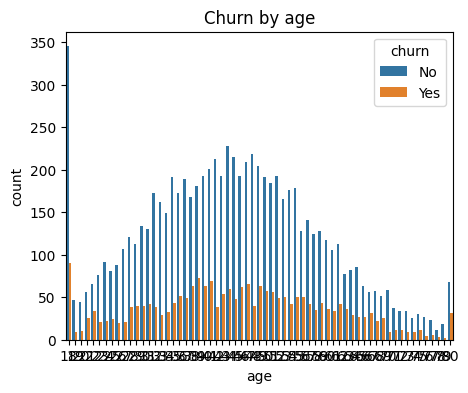

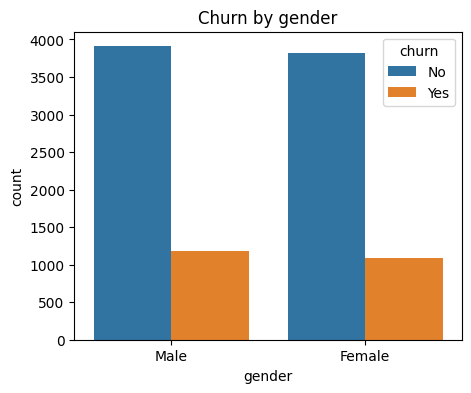

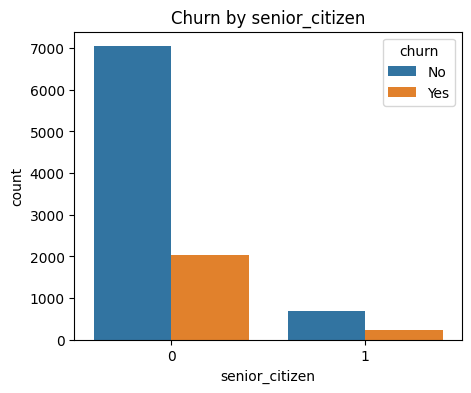

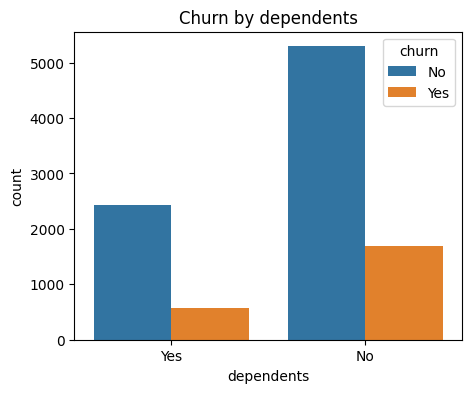

In [9]:
#Examine demographic patterns and service usage impact on churn
categorical_cols=['age', 'gender', 'senior_citizen', 'dependents']

for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=case1, x=col, hue='churn')
    plt.title(f'Churn by {col}')
    plt.show()

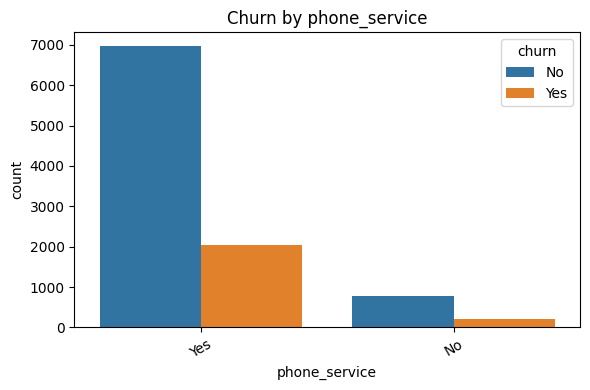

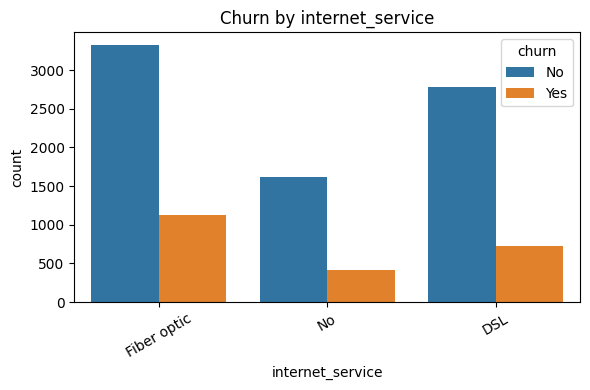

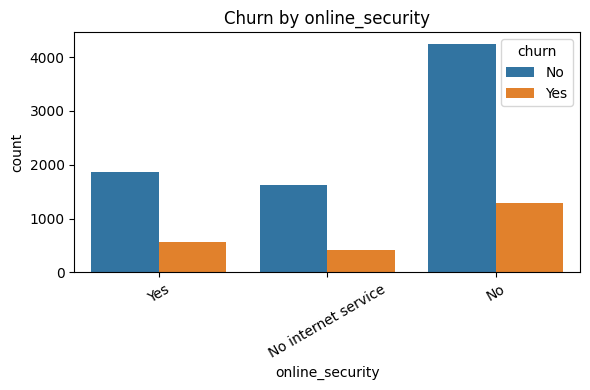

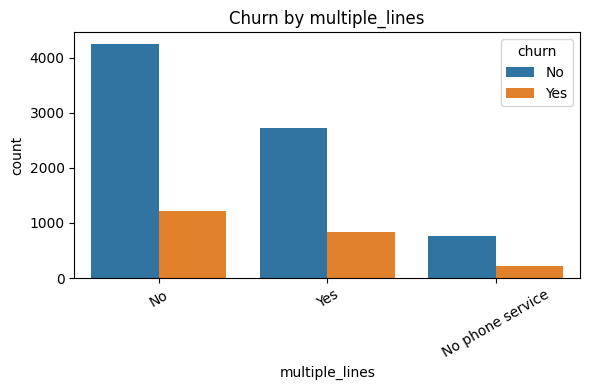

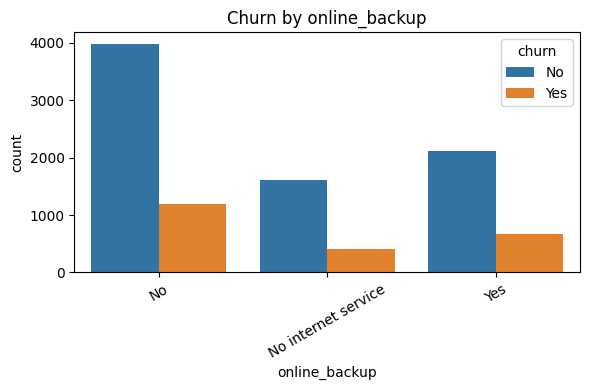

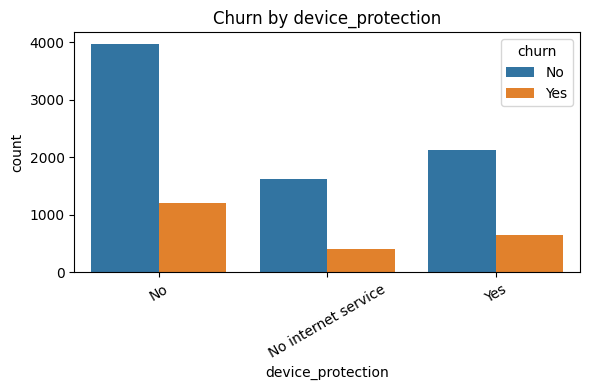

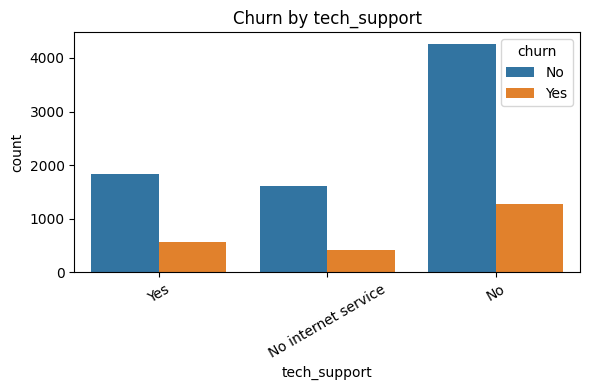

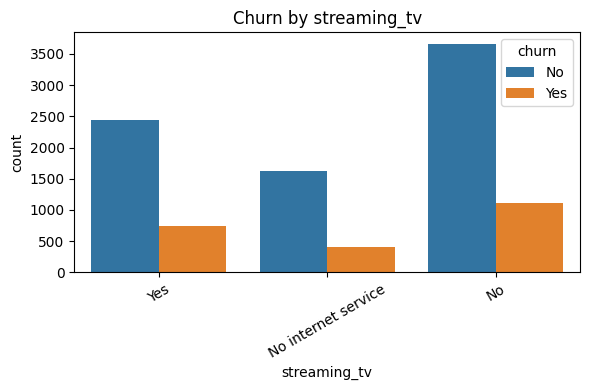

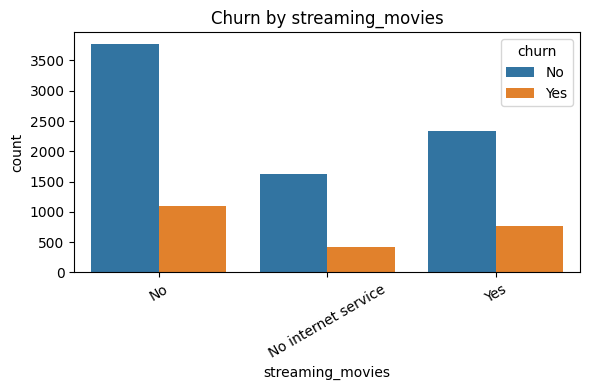

In [10]:
# Service-related columns to explore
service_cols = ['phone_service', 'internet_service', 'online_security', 'multiple_lines',
                'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
for col in service_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=case1, x=col, hue='churn')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()



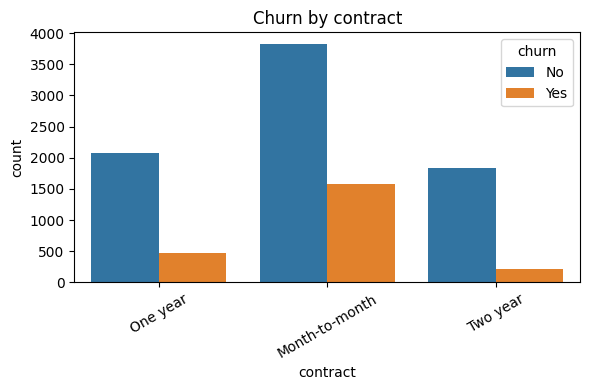

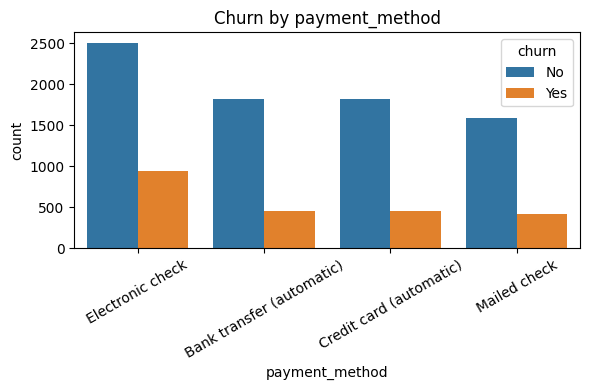

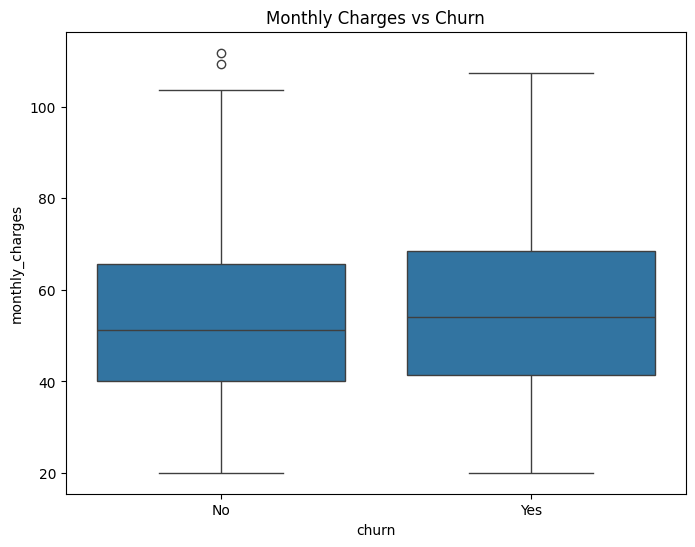

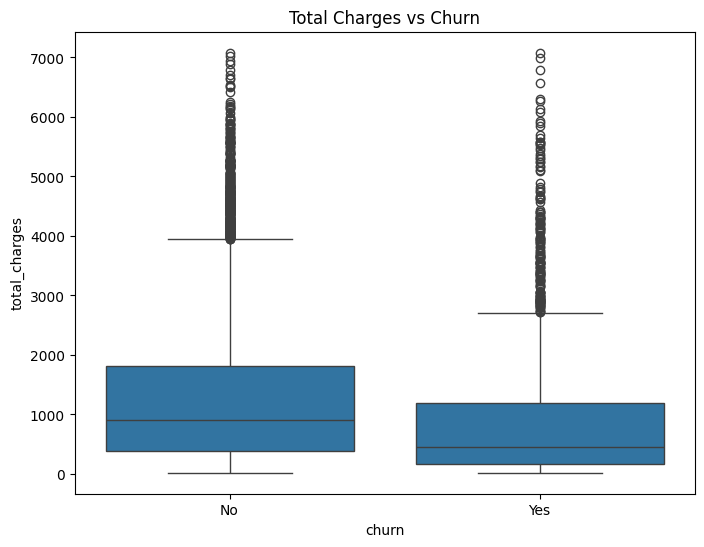

In [11]:
#Investigate financial factors and payment method effects
for col in ['contract', 'payment_method']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=case1, x=col, hue='churn')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=case1, x='churn', y='monthly_charges')
plt.title('Monthly Charges vs Churn')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=case1, x='churn', y='total_charges')
plt.title('Total Charges vs Churn')
plt.show()

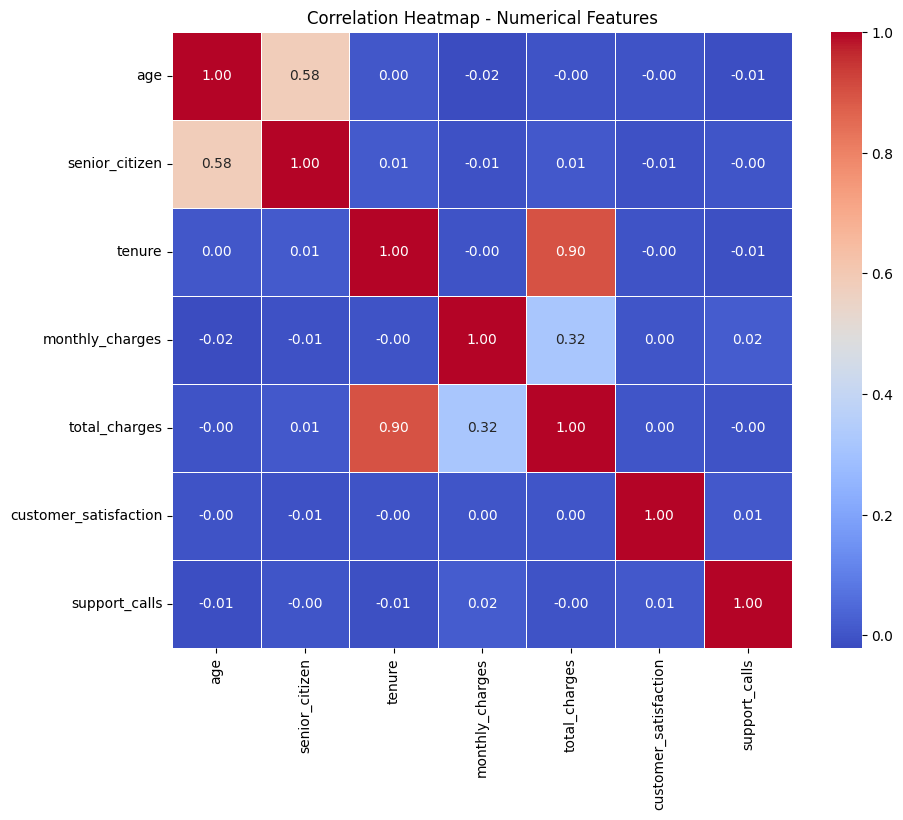

In [12]:
numeric_cols=case1.select_dtypes(include=['int64','float64']).columns
correlation_matrix=case1[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap - Numerical Features')
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder
case1_encoded = case1.copy()
binary_cols = ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
le = LabelEncoder()

for col in binary_cols:
    case1_encoded[col] = le.fit_transform(case1_encoded[col])
case1_encoded = pd.get_dummies(case1_encoded, columns=['multiple_lines', 'internet_service', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','contract', 'payment_method'], drop_first=True)

from sklearn.preprocessing import StandardScaler
numeric_features = ['age', 'tenure', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls']
scaler = StandardScaler()
case1_encoded[numeric_features] = scaler.fit_transform(case1_encoded[numeric_features])

from sklearn.model_selection import train_test_split
X = case1_encoded.drop(columns=['customer_id', 'churn'])
y = case1_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [15]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
tree_params = {'max_depth': [3, 5, 10, None]}
dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5)
dtree.fit(X_train, y_train)
print("Best Decision Tree Depth:", dtree.best_params_)

Best Decision Tree Depth: {'max_depth': 3}


In [17]:
rf_params = {'n_estimators': [50, 100],'max_depth': [5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)
print("Best Random Forest Params:", rf.best_params_)

Best Random Forest Params: {'max_depth': 10, 'n_estimators': 100}


In [18]:
svm_params = {'kernel': ['linear'], 'C': [1, 10]}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=3)
svm.fit(X_train, y_train)
print("Best SVM Params:", svm.best_params_)


Best SVM Params: {'C': 1, 'kernel': 'linear'}


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


🔹 Model: Logistic Regression
Accuracy: 0.7895
Precision: 0.609271523178808
Recall: 0.2026431718061674
F1-Score: 0.30413223140495865

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      1546
           1       0.61      0.20      0.30       454

    accuracy                           0.79      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.76      0.79      0.75      2000



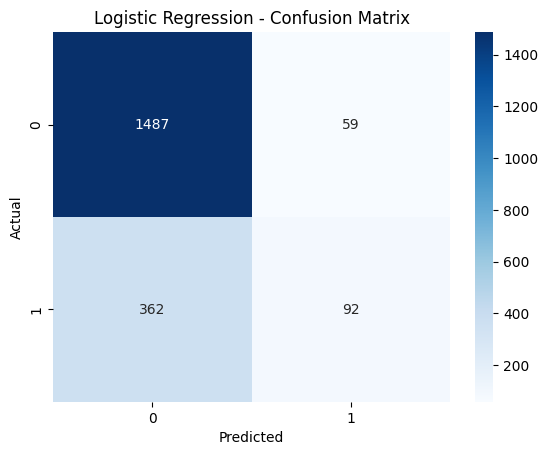

🔹 Model: Decision Tree
Accuracy: 0.7885
Precision: 0.6504854368932039
Recall: 0.14757709251101322
F1-Score: 0.24057450628366248

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1546
           1       0.65      0.15      0.24       454

    accuracy                           0.79      2000
   macro avg       0.72      0.56      0.56      2000
weighted avg       0.76      0.79      0.73      2000



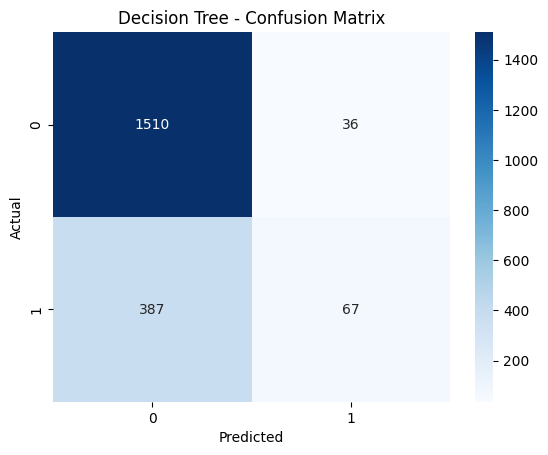

🔹 Model: Random Forest
Accuracy: 0.7905
Precision: 0.6804123711340206
Recall: 0.14537444933920704
F1-Score: 0.2395644283121597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1546
           1       0.68      0.15      0.24       454

    accuracy                           0.79      2000
   macro avg       0.74      0.56      0.56      2000
weighted avg       0.77      0.79      0.73      2000



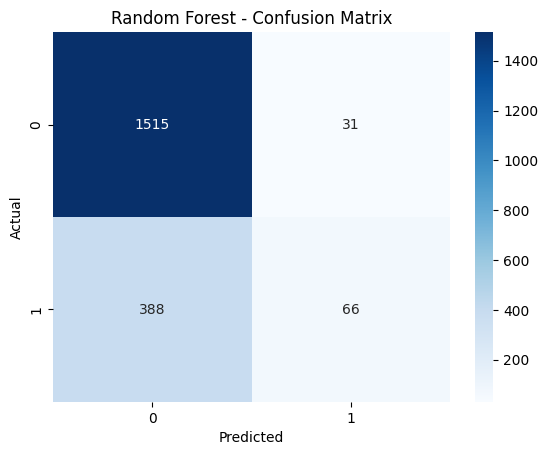

🔹 Model: SVM
Accuracy: 0.773
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1546
           1       0.00      0.00      0.00       454

    accuracy                           0.77      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.60      0.77      0.67      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

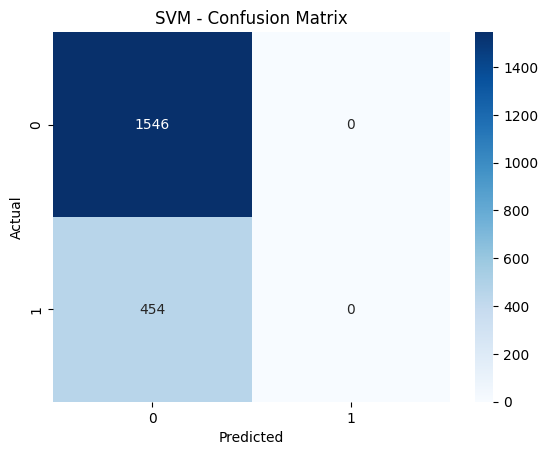

In [21]:
evaluate_model("Logistic Regression", log_reg, X_test, y_test)
evaluate_model("Decision Tree", dtree.best_estimator_, X_test, y_test)
evaluate_model("Random Forest", rf.best_estimator_, X_test, y_test)
evaluate_model("SVM", svm.best_estimator_, X_test, y_test)
